In [1]:
import numpy
from math import log
import datetime

import pandas as pd
from matplotlib import pyplot as plt

from domus_analytica.config import DomusSettings
from domus_analytica.data_clean import extract_info_to_table

config = DomusSettings(_env_file=".env.local")

df = extract_info_to_table(
    config,
    {'search_time': datetime.datetime(2024, 4, 1, 14, 46, 31, 449000)}
)
df["completion_date"] = pd.to_datetime(df["completion_date"])
df["completion_date_number"] = df["completion_date"].astype(int) / (10 ** 9 * (24 * 60 * 60) * 365.25) + 1970
df["unit_price"] = df["price"] / df["exclusive_area"]
df["min_distance_to_busy_area"] = df[
    ["distance_to_hakata", "distance_to_ohori_park", "distance_to_tenjin"]
].min(axis=1)
b2 = log(0.1) / 2.0
b5 = log(0.1) / 5.0
df["dscore_to_busy_area"] = numpy.exp(b2 * df["min_distance_to_busy_area"])
df["dscore_to_hakata"] = numpy.exp(b5 * df["distance_to_hakata"])
df["dscore_to_ohori_park"] = numpy.exp(b5 * df["distance_to_ohori_park"])
df["dscore_to_tenjin"] = numpy.exp(b5 * df["distance_to_tenjin"])

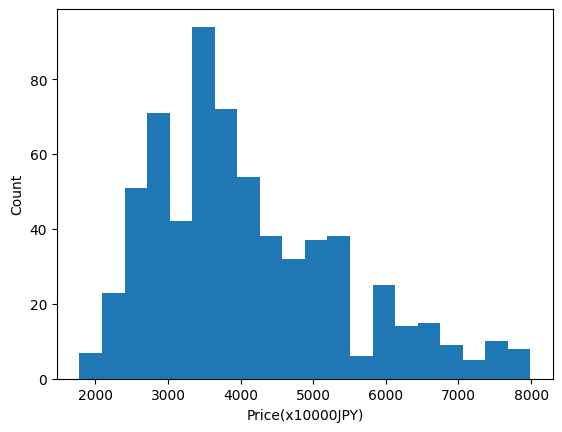

In [2]:
plt.hist(df["price"], bins=20)
plt.xlabel("Price(x10000JPY)")
_ = plt.ylabel("Count")

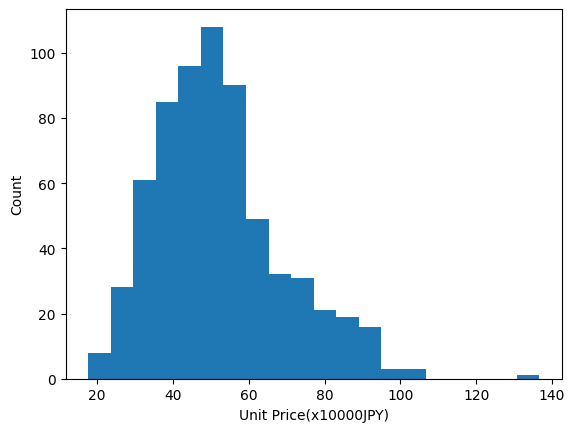

In [3]:
plt.hist(df["unit_price"], bins=20)
plt.xlabel("Unit Price(x10000JPY)")
_ = plt.ylabel("Count")

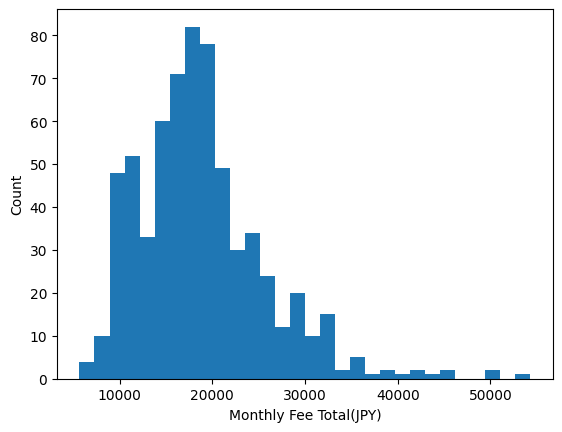

In [4]:
plt.hist(df["monthly_fee_total"], bins=30)
plt.xlabel("Monthly Fee Total(JPY)")
_ = plt.ylabel("Count")

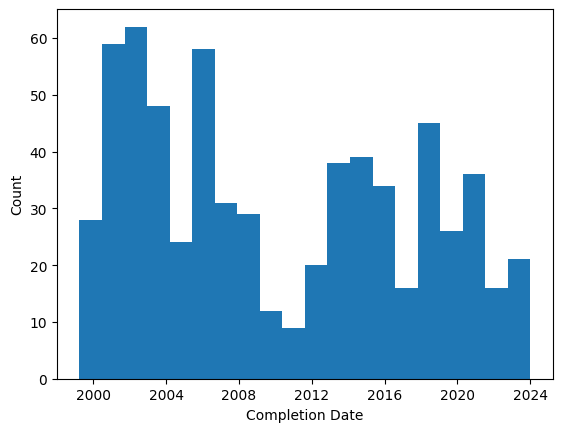

In [5]:
_ = plt.hist(df["completion_date"], bins=20)
plt.xlabel("Completion Date")
_ = plt.ylabel("Count")

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


def lr_analysis(x, y):
    m = LinearRegression()
    m.fit(x, y)
    print(f"R^2 = {m.score(x, y):.5f}")
    plt.scatter(x, y)
    plt.plot(x, m.predict(x))


def non_linear_analysis(x, y):
    m = SVR(kernel="rbf")
    m.fit(x, y)
    print(f"R^2 = {m.score(x, y):.5f}")
    plt.scatter(x, y)
    x_s = x.sort_values(by=[s for s in x.columns])
    plt.plot(x_s, m.predict(x_s))

R^2 = 0.17665


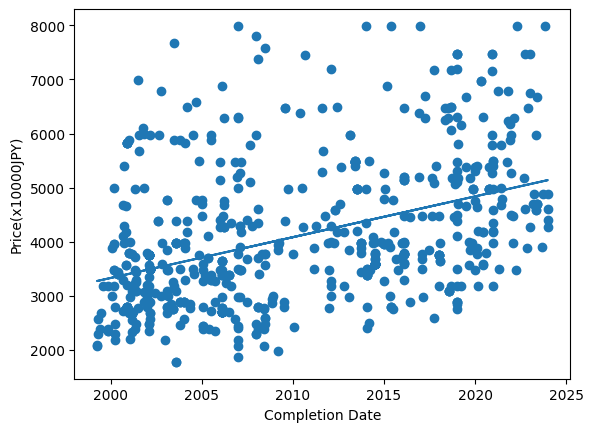

In [7]:
lr_analysis(df[["completion_date_number"]], df["price"])
plt.xlabel("Completion Date")
_ = plt.ylabel("Price(x10000JPY)")

R^2 = 0.19955


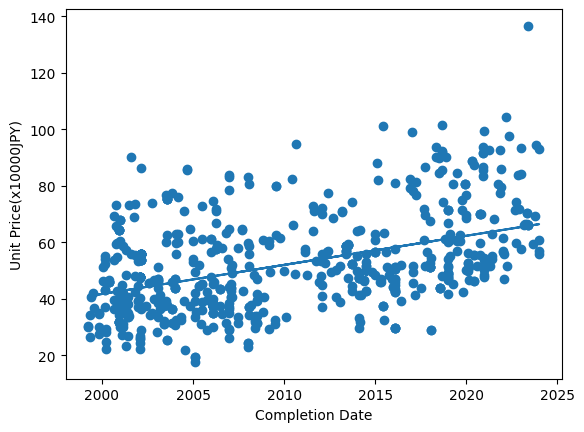

In [8]:
lr_analysis(df[["completion_date_number"]], df["unit_price"])
plt.xlabel("Completion Date")
_ = plt.ylabel("Unit Price(x10000JPY)")

R^2 = 0.02502


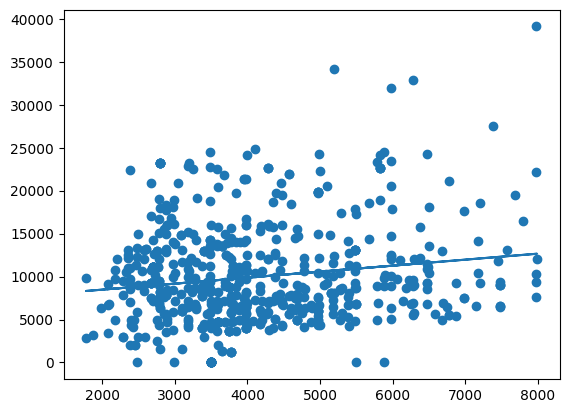

In [9]:
lr_analysis(df[["price"]], df["monthly_fee_repair"])

R^2 = 0.31882


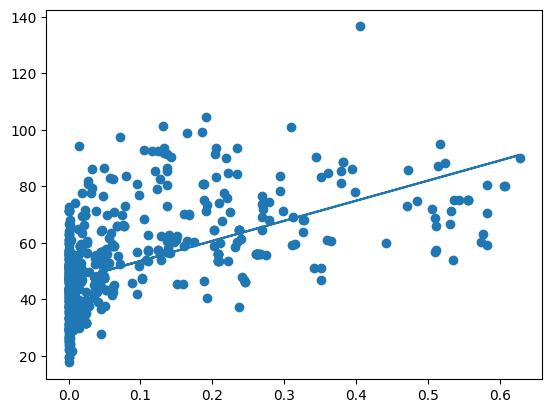

In [10]:
lr_analysis(df[["dscore_to_busy_area"]], df["unit_price"])

R^2 = 0.38847


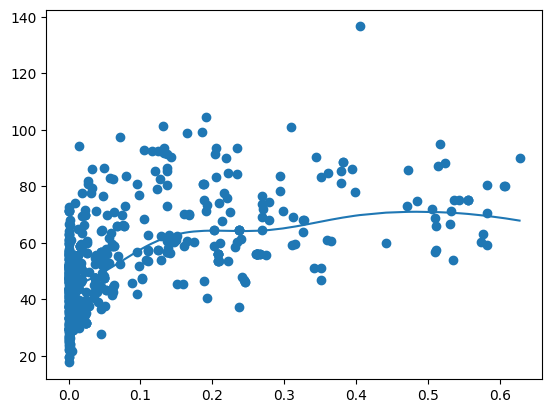

In [11]:
non_linear_analysis(df[["dscore_to_busy_area"]], df["unit_price"])

R^2 = 0.36745


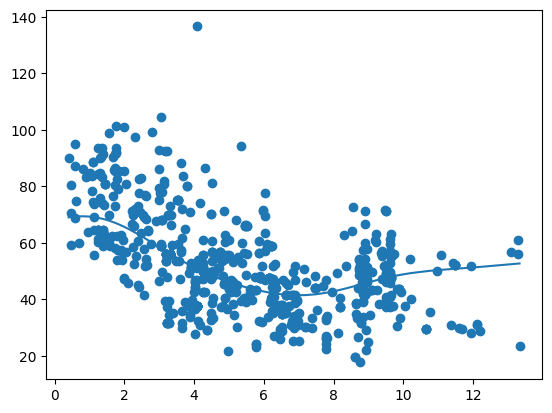

In [12]:
non_linear_analysis(df[["distance_to_ohori_park"]], df["unit_price"])

R^2 = 0.22274


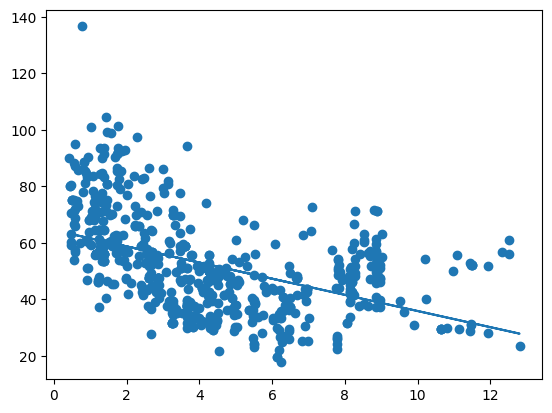

In [13]:
lr_analysis(
    df[
        ["distance_to_hakata", "distance_to_ohori_park", "distance_to_tenjin"]
    ].min(axis=1).to_frame(),
    df["unit_price"]
)

R^2 = 0.40537


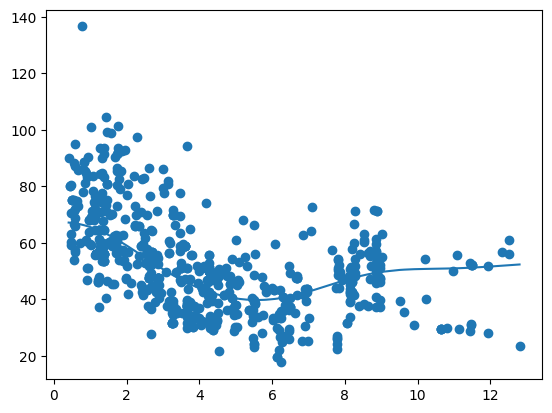

In [14]:
non_linear_analysis(
    df[
        ["distance_to_hakata", "distance_to_ohori_park", "distance_to_tenjin"]
    ].min(axis=1).to_frame(),
    df["unit_price"]
)

R^2 = 0.03678


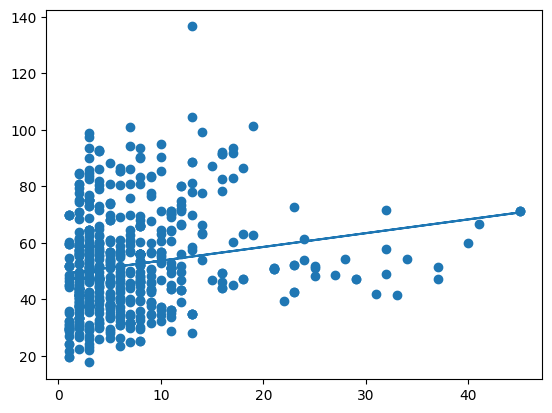

In [15]:
lr_analysis(df[["floor"]], df["unit_price"])

R^2 = 0.03645


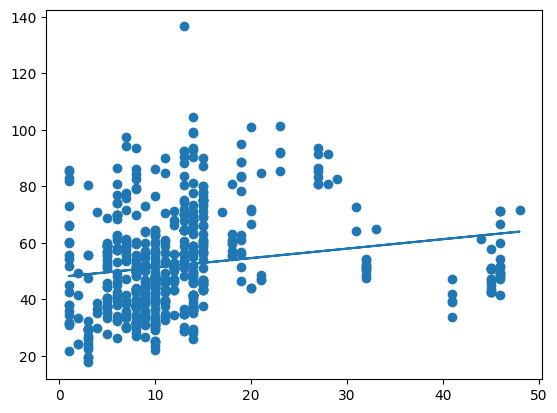

In [16]:
lr_analysis(df[["total_floors"]], df["unit_price"])

R^2 = 0.09866


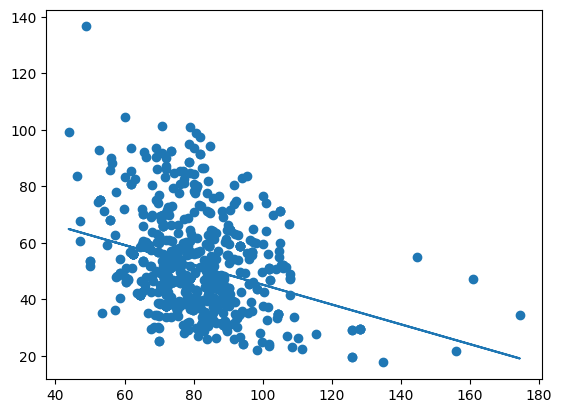

In [17]:
lr_analysis(df[["exclusive_area"]], df["unit_price"])

R^2 = 0.16266


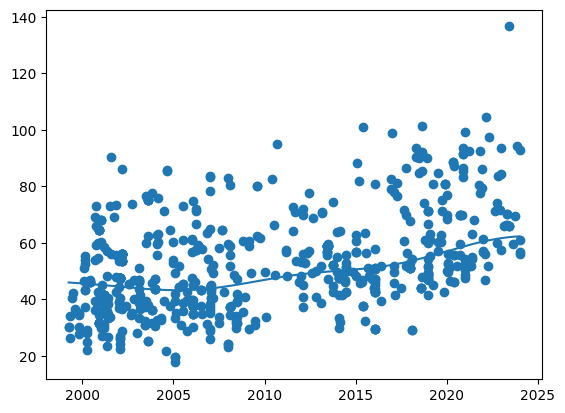

In [18]:
non_linear_analysis(df[["completion_date_number"]], df["unit_price"])